# Notebook to explore the universe of alternative alphabets

Goal is to write a poem that will allow complementary base pairing: i.e. the key and query of a dictionary can be flipped and still allow for a valid sentence.

In [1]:
import numpy as np
import pandas as pd
import string
import os
import shutil
import plotnine
from plotnine import *
from timeit import timeit
import string

from funs import makeifnot
from funs import rand_mapping, alpha_trans

In [28]:
# There are >51 billion possible alphabet encodings
print(f"{np.prod(np.arange(2,27,2)):,}")

51,011,754,393,600


In [66]:
# print(f"{:,}")
# np.prod(np.arange(1,27,1))

### (1) Download datasets

In [2]:
dir_code = os.getcwd()
dir_data = os.path.join(dir_code, '..', 'data')
makeifnot(dir_data)
# (1) Download the ngrams data for frequency
path_ngram = os.path.join(dir_data,'words_ngram.txt')
if not os.path.exists(path_ngram):
    !wget -q -O ../data/words_ngram.txt https://norvig.com/ngrams/count_1w.txt
else:
    print('words_ngram.txt already exists')

# (2) Download the curated dataset
path_words = os.path.join(dir_data,'words_corncob.txt')
if not os.path.exists(path_words):
    print('Downloading')
    !wget -q -O ../data/words_corncob.txt http://www.mieliestronk.com/corncob_lowercase.txt
else:
    print('corncob_lowercase.txt already exists')
#https://github.com/dwyl/english-words

words_ngram.txt already exists
corncob_lowercase.txt already exists


## (2) Load datasets

In [3]:
# (1) Load the Ngrams
df_ngram = pd.read_csv(path_ngram,sep='\t',header=None).rename(columns={0:'word',1:'n'})
df_ngram = df_ngram[~df_ngram.word.isnull()].reset_index(None, True)

# (2) Load the short word set
df_words = pd.read_csv(path_words,sep='\n',header=None).rename(columns={0:'word'})
df_words = df_words[~df_words.word.isnull()].reset_index(None, True)

# Overlap?
n_overlap = df_words.word.isin(df_ngram.word).sum()
print('A total of %i short words overlap (out of %i)' % 
     (n_overlap, df_words.shape[0]))

# Merge datasets in the intersection
df_merge = df_ngram.merge(df_words,'inner','word')
df_merge = df_merge.assign(n_sqrt=lambda x: np.sqrt(x.n), n_log=lambda x: np.log(x.n))

# Examine the score frequency by percentiles
p_seq = np.arange(0.01,1,0.01)
dat_n_q = df_merge.melt('word',None,'tt').groupby('tt').value.quantile(p_seq).reset_index()
dat_n_q.rename(columns={'level_1':'qq'}, inplace=True)
dat_n_q.tt = pd.Categorical(dat_n_q.tt,['n','n_sqrt','n_log'])
di_tt = {'n':'n', 'n_sqrt':'sqrt','n_log':'log'}

A total of 51886 short words overlap (out of 58109)


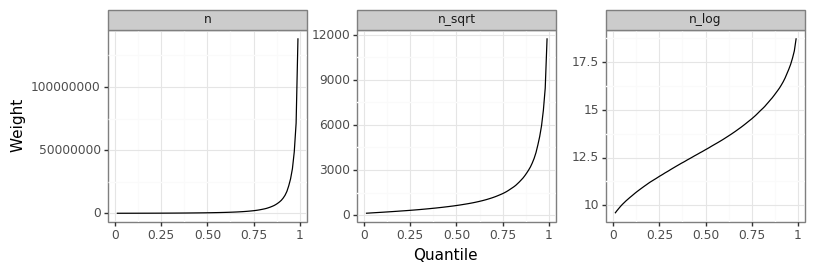

<ggplot: (8748061946660)>

In [4]:
# DISTIRUBTION OF WORD FREQUENCIES
plotnine.options.figure_size = (9, 2.5)
gg_q = (ggplot(dat_n_q, aes(x='qq',y='value')) + geom_path() + 
       theme_bw() + facet_wrap('~tt',scales='free_y') + 
       labs(y='Weight', x='Quantile') + 
       theme(subplots_adjust={'wspace': 0.25}))
gg_q

In [5]:
print('The ten most and least common words in the corpus')
pd.concat([df_merge.head(10)[['word','n']].reset_index(None,True),
           df_merge.tail(10)[['word','n']].reset_index(None,True)],1)

The ten most and least common words in the corpus


,word,n,word,n
0,the,23135851162,offcuts,12748
1,of,13151942776,hinderer,12737
2,and,12997637966,eminences,12734
3,to,12136980858,vaporisation,12732
4,in,8469404971,expurgated,12732
5,for,5933321709,concussed,12732
6,is,4705743816,griever,12729
7,on,3750423199,sibilance,12720
8,that,3400031103,synchronises,12719
9,by,3350048871,insatiably,12717


### (3) Create mappings

In [43]:
letters = [l for l in string.ascii_lowercase]
num_letters = np.arange(1,27)
di_num2let = dict(zip(num_letters, letters))
nletters = 26
Xmap = rand_mapping(1,letters, nletters)
di_map = dict(zip(Xmap[:,0], Xmap[:,1]))
rwords = df_merge.word.sample(3,random_state=1)
print(pd.DataFrame({'words':rwords, 'mapped':alpha_trans(rwords, Xmap).values}))
print('Mapping: %s' % (','.join(pd.DataFrame(Xmap).apply(lambda x: x.str.cat(sep=':'),1).to_list())))

         words   mapped
43284  scarcer  neqdecd
7314   adaptor  qrqzuhd
7460   distant  rmnuqsu
Mapping: s:n,r:d,w:k,t:u,e:c,v:g,o:h,x:b,q:a,p:z,y:j,i:m,l:f


In [81]:
# FIGURE OUT HOW TO COUNT THE PERMUTATIONS!


[325, 276, 231, 190, 153, 120, 91, 66, 45, 28, 15, 6, 1]

In [ ]:


from scipy.special import comb
[comb(N=28-k, k=2, exact=True) for k in range(2,27,2)]

In [40]:
# https://stackoverflow.com/questions/7918806/finding-n-th-permutation-without-computing-others
# https://stackoverflow.com/questions/25105871/get-a-permutation-as-a-function-of-a-unique-given-index-in-on

from math import factorial
import itertools

def nthPerm(n,elems):#with n from 0
    if(len(elems) == 1):
        return elems[0]
    sizeGroup = factorial(len(elems)-1)
    q,r = divmod(n,sizeGroup)
    v = elems[q]
    elems.remove(v)
    return v + ", " + nthPerm(r,elems)

In [73]:
nthPerm(101012000000000000000001506,letters[:])

'g, n, v, i, f, y, k, p, b, z, d, j, x, l, m, u, w, q, o, e, r, c, a, s, h, t'

In [74]:
lst = ['a','b','c']
lst_perm = list(itertools.permutations(lst))

for i in range(len(lst_perm)):
    print(nthPerm(i,lst[:]))

a, b, c
a, c, b
b, a, c
b, c, a
c, a, b
c, b, a


In [8]:
# txt = words.sample(13,random_state=1).copy()
# trans = alpha_trans(txt, Xmap)
# df_example = pd.concat([pd.DataFrame(Xmap,columns=['from','to']),
#                         pd.DataFrame({'original':txt, 'mapped':trans}).reset_index(None,True)],1)
# print(df_example)  #[['from','to']]

In [ ]:
# from time import time

# nsim = 80000
# tnow = time()

# holder = []
# for ii in range(nsim):
#     if (ii+1) % 10000 == 0:
#         tdiff = time() - tnow
#         print('Simulation %i of %i (took %i seconds)' % (ii+1, nsim, tdiff))
#         tnow = time()
#     # Generate a random mapping
#     Xmap = gen_mapping(ii, letters, nletters)
#     words = words[words.notnull()].reset_index(None,True)
#     trans = alpha_trans(words.copy(), Xmap)
#     idx = trans.isin(words)
#     df = pd.DataFrame({'original':words[idx],'mapped':trans[idx],'seed':ii})
#     holder.append(df)
# dat_sim = pd.concat(holder).reset_index(None,True)